In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.odr import *

In [7]:
filepath="txt_files/C_SX"
df=pd.read_csv(filepath+".txt",sep="\t").dropna()

In [9]:
df

,V[dV],Gain[mV],SigmaV[dV],SigmaGain[mv]
2,300,5.86085,3,0.048589
3,305,7.90047,3,0.008060
4,310,9.53069,3,0.074261
5,315,4.26331,3,0.007355
6,320,13.05640,3,0.017772
7,325,14.91170,3,0.100838
8,330,16.58110,3,0.048729


Beta: [ -0.98706408 321.04774908]
Beta Std Error: [  1.39620722 439.59996373]
Beta Covariance: [[ 6.55267863e-02 -2.06293120e+01]
 [-2.06293120e+01  6.49582632e+03]]
Residual Variance: 29.749583594664756
Inverse Condition #: 0.00042773437136419854
Reason(s) for Halting:
  Iteration limit reached


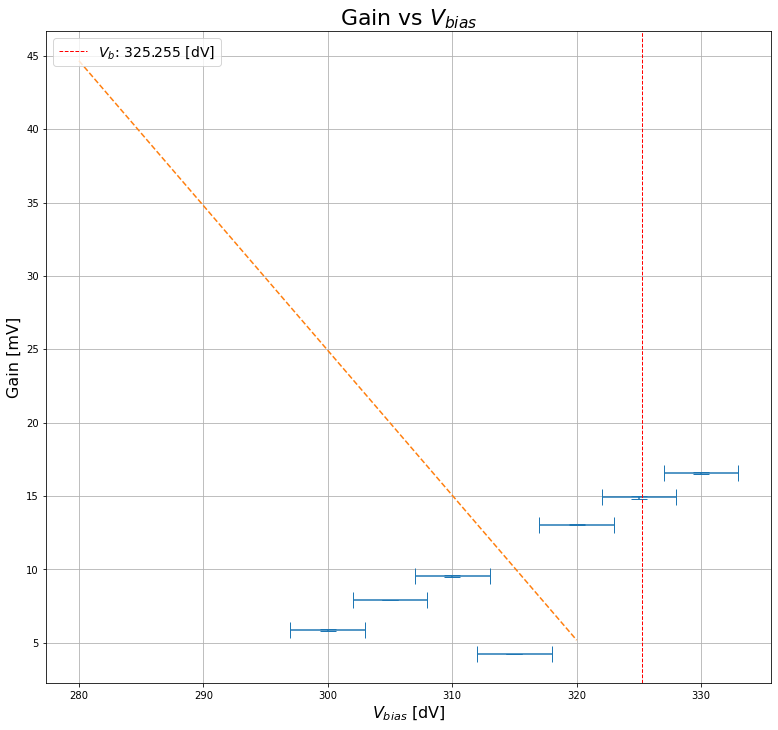

In [8]:
x_data=df["V[dV]"]
y_data=df["Gain[mV]"]

err_x=df["SigmaV[dV]"]
err_y=df["SigmaGain[mv]"]

def linear(p,x):
    m,q=p
    return m*x+q


# Create a model for fitting.
linear_model = Model(linear)

# Create a RealData object using our initiated data from above.
data = RealData(x_data, y_data, sx=err_x, sy=err_y)

# Set up ODR with the model and data.
odr = ODR(data, linear_model, beta0=[0., -50.])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

fig,ax=plt.subplots(1,1,figsize=(13,12))
x_fit=np.linspace(280,x_data[len(x_data)-1],1000)
V_b=-out.beta[1]/out.beta[0]
ax.errorbar(x=x_data,y=y_data,xerr=err_x,yerr=err_y,linestyle="none",capsize=8)
ax.plot(x_fit,linear(out.beta,x_fit),linestyle="dashed")
ax.axvline(V_b, color='red', linestyle='dashed', linewidth=1,label= "$V_b$: {} [dV]".format(round(V_b,3)))
ax.set_title("Gain vs $V_{bias}$",fontsize=22)
ax.set_xlabel("$V_{bias}$ [dV]",fontsize=16)
ax.set_ylabel("Gain [mV]",fontsize=16)
ax.grid()
ax.legend(loc="upper left",fontsize=14)
plt.show()
fig.savefig("filepath.pdf")